<a href="https://colab.research.google.com/github/lphansen/RiskUncertaintyValue/blob/main/uncertainexpansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/src')
# !git clone https://github.com/lphansen/RiskUncertaintyValue # Please uncomment this line when running on the google colab
# workdir = os.getcwd() + '/RiskUncertaintyValue'             # Please uncomment this line when running on the google colab
import numpy as np
import autograd.numpy as anp
from scipy import optimize
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=200)
from IPython.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))
from uncertain_expansion import uncertain_expansion
import warnings
warnings.filterwarnings("ignore")

# Small Noise Expansion

A nonlinear DSGE model typicaly cannot be solved quasi-analytically.  We consider  a small-noise expansion method to find an approximate solution modified to incorporate recursive utility formulation motivated by robustness or risk concerns. 

# 1 Underlying setup
The model's equilibrium conditions are described by a system of possibly nonlinear, expectational difference equations

$$
\begin{align}
\mathbb{E}[{N_{t+1}^*Q_{t+1}^* \psi_1(X_t, J_t, X_{t+1}, J_{t+1})}|{\mathfrak{A}_t}] - \psi_2(X_t, J_t)  &= 0 \tag{1}\\
X_{t+1} - \phi\left(X_t, J_t, {\sf q}W_{t+1}, {\sf q} \right) &= 0 
\tag{2} \end{align}
$$
where $X_t$ is an $n$-dimensional date $t$ state vector, $J_t$ is an $m$-dimensional date $t$ jump vector, and $W_{t+1}$ is distributed as a $k$-dimensional standard normal.  The real variable ${\sf q}$ is nonnegative and it scales the shock $W_{t+1}$.  The stochastic processes $X$ and $J$ depend implicitly on ${\sf q}$.  In effect, we study a family of models and their solutions indexed by ${\sf q}$.  We suppose that the limit ${\sf q} = 0$ emerges from a deterministic model for which the equations pin down a steady-state, stable equilbrium solution to the equations (1) and (2). 

The first set of $m$ equations is forward looking and hence involve expectations along with contributions $N_{t+1}^*$ and $Q_{t+1}^*$ from recursive utility.   
For instance, the first-order necessary condition for optimal investment contributes to a forward-looking equation with, say the investment to capital ratio or its logarithm as a jump variable. The second set of $n$ equations give the dynamic evolution of the state vector.  A central part of the solution is to express the jump vector as a function of the state vector.  The stochastic equilibrium is then solved by imposing stochastic stability.  

We feature models in which economic agents have preferences given by the recursive specification of preferences:

$$
\begin{align}
V_t & =\left[(1-\beta)\left(C_t\right)^{1-\rho}+\beta\left(R_t\right)^{1-\rho}\right]^{\frac{1}{1-\rho}}
\tag{3} \\
R_t & =\mathbb{E}\left[\left(V_{t+1}\right)^{1-\gamma} \mid \mathfrak{A}_t\right]^{\frac{1}{1-\gamma}}
\tag{4}\end{align}
$$

In equation (3), $0 < \beta < 1$ is a subjective discount factor and $\rho$ depicts  attitudes toward intertemporal substitution.[^1]  In equation (4),
$\gamma$ depicts attitudes towards risk or $\xi = \frac 1 {\gamma - 1}$ is penalty parameter used to capture concerns about model misspecification.   

For computational and conceptual reasons, we find it
advantageous to work with the logarithm ${\widehat V}_t = \log V_t$.  The corresponding recursions for ${\widehat  V}_t$ expressed in terms of the logarithm of consumption
${\hat  C}_t$ are 
$$
\begin{align} 
{\widehat  V}_t & = {\frac 1 {1 - \rho}}  \log \left[ (1 - \beta) \exp[(1-\rho) {\widehat  C}_t] + \beta \exp \left[(1-\rho) {\widehat  R}_t \right] \right]
\tag{5} \\
{\widehat  R}_t & = {\frac 1 {1 - \gamma}} \log {\mathbb E} \left(  \exp \left[ (1 - \gamma) {\widehat V}_{t+1} \right] \mid {\mathfrak A}_t \right).
\tag{6} \end{align}
$$

Construct
$$
\begin{align}
N_{t+1}^* & \stackrel{\text { def }}{=} \exp \left[(1 - \gamma) \left({\widehat V}_{t+1} - {\widehat R}_t\right) \right] \tag{7} \\
 Q_{t+1}^* & \stackrel{\text { def }}{=} \exp \left[(1 - \rho) \left({\widehat V}_{t+1} - {\widehat R}_t\right) \right]. \tag{8} 
\end{align}
$$
Notice that $N_{t+1}^*$ has expectation one conditioned on ${\mathfrak A}_t$ and induces a change of probability measure motived by a robustness adjustment to potential model misspecification.    The expansion treats the approximation of $N_{t+1}^*$ and $ Q_{t+1}^*$ differently.  Both are computed in a separate step from the solution to equation (1) given $N_{t+1}^*$ and $Q_{t+1}^*$.  The implied one-period stochastic discount factor 
\begin{equation*}
N_{t+1}^*Q_{t+1}^* \left( \frac {C_{t+1}}{C_t} \right)^{-\rho}
\end{equation*} 
where the last contribution is familiar from models with time separable, power utility preferences.  

We restrict $\gamma > 1$, and index it by the parameter ${\sf q}$ according to:
\begin{equation*}
\xi = \frac {1 - \gamma}{\sf q}  \xi_o = \frac {\sf q} {1 - \gamma_o} .  
\end{equation*} 
This embedding makes the uncertainty adjustments matter at a lower order.  It has a particularly nice interpretation when we interpret the recursion as a way to represent a preference for robustness to potential model misspecification.  We take ${\sf q} = 1$ as the economy of interest.

[^1] Formally, ${\frac {1}{\rho}}$ is the elasticity of intertemporal substitution.

# 2 Approximating ${\widehat V}_t$ 

## 2.1 Zeroth-order contribution

We assume that the first difference in the logarithm of consumption is stationary For models with production, this representation will become part of the derived expansion. For order zero, we presume a constant growth rate:
$$
{\widehat C}_{t+1}^0 - {\widehat  C}_t^0  = \eta_c .
$$
The order-zero approximation of (5), ${\widehat  V}_t^0 - {\widehat  C}_t^0 =\eta_{v-c}$, is determined by 
$$
\exp\left[(1-\rho) {\left( \eta_{v - c} \right) }\right] = {\frac {1 - \beta} { 1 - \beta \exp \left[ (1 - \rho) \eta_c \right]}} .
$$





## 2.2 First-order contribution

The first-order approximation of ${\widehat V}_t$ net of ${\widehat C}_t^1$ is given by 
$$
{\widehat  V}_t^1 - {\widehat  C}_t^1 = \lambda \left( {\widehat  R}_t^1 - {\widehat  C}_t^1 \right)
$$
where
$$
{\widehat  R}_t^1 - {\widehat  C}_t^1 =  \left({\frac 1 {1 - \gamma_o}} \right) \log {\mathbb  E}  \left( \exp \left[ (1 - \gamma_o) \left[ \left( {\widehat V}_{t+1}^1 - {\widehat C}_{t+1}^1\right) + 
\left({\widehat C}_{t+1}^1 - {\widehat C}_{t}^1
\right)   \right] \right] \mid {\mathfrak A}_t \right)\
$$
and $0 < \lambda < 1$  satisfies 
$$
\begin{align*}
\lambda  & = \beta \exp \left[(1-\rho) \eta_c \right]
\end{align*}
$$
Combining these equations gives the following equation to be solved 
$$
\begin{align*} 
{\widehat  V}_t^1 - {\widehat  C}_t^1
= & \lambda \left({\frac 1 {1 - \gamma_o}} \right) \log {\mathbb  E}  \left( \exp \left[ (1 - \gamma_o) \left[ \left( {\widehat V}_{t+1}^1 - {\widehat C}_{t+1}^1\right) + 
\left({\widehat C}_{t+1}^1 - {\widehat C}_{t}^1
\right)   \right] \right] \mid {\mathfrak A}_t \right)
\tag{9} \end{align*} 
$$

## 2.3 Second-order contribution

The second-order approximation is: 
$$
{\widehat  V}_t^2 - {\widehat  C}_t^2 = \lambda \left( {\widehat  R}_t^2 - {\widehat  C}_t^2 \right) +  (1- \rho) (1-\lambda) \lambda  \left( {\widehat  R}_t^1 - {\widehat  C}_t^1\right)^2
$$
where
\begin{align*}
{\widehat  R}_t^2  =  E \left( N_{t+1}^0  {\widehat V}^2_{t+1} \mid {\mathfrak A}_t \right),
\end{align*}
and $N_{t+1}^0$ is given by
\begin{equation*}
N_{t+1}^0 = \exp \left[\left(1-\gamma_o\right)\left(\widehat{V}_{t+1}^1-\widehat{R}_t^1\right)\right]
\end{equation*} 

Combining these formulas, gives the following equation to be solved:
\begin{align*} 
{\widehat  V}_t^2 - {\widehat  C}_t^2 =  & \hspace{.2cm} \lambda 
{\mathbb E}  \left[ N_{t+1}^0 \left({\widehat V}^2_{t+1} - {\widehat C}_{t+1}^2 \right) \mid {\mathfrak A}_t \right]  + \lambda  {\mathbb E}  \left[ N_{t+1}^0 \left( {\widehat C}^2_{t+1} - {\widehat C}_{t}^2 \right) \mid {\mathfrak A}_t \right] + \frac{(1- \rho) (1-\lambda)}{\lambda } \left[ \left( {\widehat  V}_t^1 - {\widehat  C}_t^1\right)^2 \right] . \tag{10}
\end{align*}

The formual for $N_{t+1}^0$ also happens to be the zeroth-order approximation to $N_{t+1}^*$ given by definition (8).  Since $N_{t+1}^0$ is positive and has conditional mean equal to one, it induces a change in probability distribution whereby $W_{t+1}$ is distributed as a multivariate normal with mean $\mu^o$ and covariance matrix $I$.  The algorithm uses this change of probability distribution in the computations.  The first-order contribution to $N_{t+1}^*$ is  
$$
\begin{equation*}
N_{t+1}^1 {=}\left(\frac{1-\gamma_o}{2}\right) N_{t+1}^0\left(\widehat{V}_{t+1}^2-\widehat{R}_t^2\right)
\end{equation*}
$$



The algorithm also uses the following approximation formulas for $Q_t^*$ given by definition {9}
$$
\begin{aligned}
& Q_{t+1}^0 {=} \exp \left[(\rho-1)\left(\widehat{V}_{t+1}^0-\widehat{R}_t^0\right)\right]=1 \\
& \left.Q_{t+1}^1 {=} \frac{d}{d {\sf q}} \exp \left[(\rho-1)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)\right]\right|_{\mathbf{q}=0}=(\rho-1)\left(\widehat{V}_{t+1}^1-\widehat{R}_t^1\right) \\
& \left.Q_{t+1}^2 {=} \frac{d^2}{d \mathsf{q}^2} \exp \left[(\rho-1)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)\right]\right|_{\mathbf{q}=0}=(\rho-1)^2\left(\widehat{V}_{t+1}^1-\widehat{R}_t^1\right)^2+(\rho-1)\left(\widehat{V}_{t+1}^2-\widehat{R}_t^2\right)
\end{aligned}
$$

The code will produce the coefficient inputs into the following formulas:
$$
\widehat{V}_{t+1}^1-\widehat{R}_t^1=\frac{1}{1-\gamma_o}\left[\mu^0 \cdot\left(W_{t+1}-\mu^0\right)+\frac{1}{2} \mu^0 \cdot \mu^0\right]
$$
and 
$$
\begin{aligned}
\widehat{V}_{t+1}^2-\widehat{R}_t^2= & \frac{1}{2}\left(W_{t+1}-\mu^0\right)^{\prime} \Upsilon_2^2\left(W_{t+1}-\mu^0\right)-\frac{1}{2} \operatorname{tr}\left(\Upsilon_2^2\right)+\left(W_{t+1}-\mu^0\right)^{\prime}\left(\Upsilon_1^2 X_t^1+\Upsilon_0^2\right)
\end{aligned}
$$

# 3 Algorithm 


The algorithm initializes $\mu^0, \Upsilon^2_0, \Upsilon^2_1,$ and $\Upsilon^2_2$ at zero.  It uses the first and second order approximations of Schmidt-Grohe and Uribe (2004) and Lombardo and Uhlig (2018) with some modifications.  

## 3.1: Step 1
Take as input $\mu^0, \Upsilon^2_0, \Upsilon^2_1,$ and $\Upsilon^2_2$.  Transform the first-order and second-order approximations for the state evolution by using the probability induced by $N_{t+1}^0.$  Under this distribution, $W_{t+1}$ has a conditional distribution with a mean given by $\mu^0$ and covariance matrix $I$.

## 3.2: Step 2
When solving for the first-order approximation, an additional term needs to added to the forward equation system to accomodate the recursive utility adjustment: 
$$
\bar{H}^1 \stackrel{\text { def }}{=} \frac{(\rho-1)}{2\left(1-\gamma_o\right)}\left|\mu^o\right|^2 H_{t+1}^0 
$$
where
$$
H_{t+1}^0 =  \psi_1(X_t^0, J_t^0,  X_{t+1}^0, J_{t+1}^0, 0,0)
$$
and is time invariant.

## 3.3: Step 3
When solving for the second-order approximation, an additional term needs to be added to the forward equation system to accomodate the recursive utility adjustment:
$$
\begin{aligned} 
{\bar H}^2_t  \stackrel{\text { def }}{=} &\left(1-\gamma_o\right) \Theta_2^1\left(\Upsilon_1^2 X_t^1+\Upsilon_0^2\right) \\
& +(\rho-1) \mu^o \cdot\left(\Upsilon_1^2 X_t^1+\Upsilon_0^2\right) H_{t+1}^0 \\
& + 2 \frac{(\rho-1)}{\left(1-\gamma_o\right)}\left[\Theta_2^1 \mu^0+\frac{1}{2} \mu^0 \cdot \mu^0\left(\Theta_0^1+\Theta_1^1 X_t^1\right)\right] \\
& + \left(\frac{1-\rho}{1-\gamma_o}\right){ }^2\left(\left|\mu^0\right|^2+\frac{1}{4}\left|\mu^0\right|^4\right)
\end{aligned} 
$$
where $\Theta_0^1, \Theta_1^1,$ and $\Theta_2^1$ come from expressing the first-order approximation, $H_{t+1}^1,$ of 
$$
H_{t+1} \stackrel{\text { def }}{=}  \psi_1(X_t, J_t, X_{t+1}, J_{t+1})
$$
as
$$
H_{t+1}^1=\Theta_0^1+\Theta_1^1 X_t^1+\Theta_2^1\left(W_{t+1}-\mu^0\right)
$$

## 3.4: Step 4

Compute  an upated $\mu^0, \Upsilon^2_0, \Upsilon^2_1,$ and $\Upsilon^2_2$ and return to Step 1.

The algorithm continues until it reaches a numerical convergence.

# 4 Adjustment cost example


## 4.1 Production
Consider a model recursive utility preferences and an AK technology with adjustment costs. 


$$
{C_t} + {I_t}  = {\mathbf a}K_t\tag{12}
$$
$$
K_{t+1}  = K_t \left[1 + \theta_2 \left({\frac {I_t} {K_t}}\right) \right]^{\theta_1} \exp(B_{t+1} - B_t)\tag{13}
$$
$$
B_{t+1} - B_t =  - \alpha_k + Z_t - {\frac 1 2} \mid \sigma_k \mid^2  + \sigma_k\cdot W_{t+1}\tag{14}
$$
$$
Z_{t+1} = {\mathbb A} Z_t + \mathbb{B} W_{t+1} \tag{15}
$$
where $Z_{t+1}$ is a scalar. $W_{t+1}$ is a shock vector containing 2 entries.  For the purposes of computation, we divide the first two equations by $K_t$.

## 4.2 FOC on Investment
The consumer's stochastic discount factor is
$$
\frac{S_{t+1}}{S_t} = \beta \left(\frac{V_{t+1}}{R_t}\right)^{1-\gamma} \left(\frac{V_{t+1}}{R_t}\right)^{\rho-1} \left(\frac{C_{t+1}}{C_t}\right)^{-\rho}
$$
The first-order condition for investment is:
$$
MC_t \mathbb{E}\left[\left(\frac{S_{t+1}}{S_t}\right) \frac {MK_{t+1}}{MC_{t+1}}  \left(\theta_1 \theta_2\left[1+\theta_2\left(\frac{I_t}{K_t}\right)\right]^{\theta_1-1} \exp(B_{t+1} - B_t) \right) \mid \mathfrak{A}_t\right] - MC_t  = 0.  
$$
where $MK_{t+1}$ the co-state associated with the capital evolution and $MC_t$ is the multiplier associated with the production relation. Dividing this first-order condition by $MC_t$ gives:
$$
\mathbb{E}\left[\left(\frac{S_{t+1}}{S_t}\right) \frac {MK_{t+1}}{MC_{t+1}}  \left(\theta_1 \theta_2\left[1+\theta_2\left(\frac{I_t}{K_t}\right)\right]^{\theta_1-1} \exp(B_{t+1} - B_t)\right) \mid \mathfrak{A}_t\right] - 1  = 0,\tag{16}
$$
which is the equation we use in computation.  

The co-state equation satisfies:
\begin{align*}
& MC_t \mathbb{E}\left[\left(\frac{S_{t+1}}{S_t}\right) \left(\frac {MK_{t+1}}{MC_{t+1}} \right) \left[\left( \frac{K_{t+1}}{K_t} \right) - \left(\theta_1 \theta_2\left[1+\theta_2\left(\frac{I_t}{K_t}\right)\right]^{\theta_1-1} \exp(B_{t+1} - B_t)\right)\left(\frac {I_t} {K_t} \right)  \right] \mid {\mathfrak A}_t \right]\cr &  - MK_t + {\mathbf a} MC_t = 0
\end{align*}
Dividing this equation by $MC_t$ gives:
$$
 \mathbb{E}\left[\left(\frac{S_{t+1}}{S_t}\right) \left(\frac {MK_{t+1}}{MC_{t+1}} \right) \left[\left( \frac{K_{t+1}}{K_t} \right) - \left(\theta_1 \theta_2\left[1+\theta_2\left(\frac{I_t}{K_t}\right)\right]^{\theta_1-1}  \exp(B_{t+1} - B_t)\right)\left(\frac {I_t} {K_t} \right)  \right] \mid {\mathfrak A}_t \right] - \frac {MK_t}{MC_t} + {\mathbf a}  = 0,
\tag{17}$$
which is the equation we use in computation.  

## 4.3 State and jump variables

This formulation has two state variables: $\log K_{t} - \log K_{t-1},  B_t -  B_{t-1},$ and $Z_{t}$; and has three jump variables:
$\log C_t - \log K_t,\log I_t - \log K_t$ and $\log MK_t - \log MC_t$.   

# 5 Computation

We use Expansion Suite to approximate the solution to the adjustment cost model described above.

## 5.1 Model specifications

### 5.1.1 Model parameters

In this numerical example, we set the preference parameters as
$$
\gamma=10,\quad
\rho=1.5,\quad
\beta=\exp(-0.005)
$$
and the other model parameters as
$$
\begin{aligned}
{\mathbf a}&=0.0355\\
\theta_1&=0.0125\\
\theta_2&=400\\
\alpha_k&=0.025\\
\sigma_k&=0.01\begin{bmatrix}0.477 \\ 0\end{bmatrix}\\
\mathbb{A}&=\exp(-0.014)\\
\mathbb{B}&=0.01\begin{bmatrix}0.011 & 0.025 \\ 0 & 0\end{bmatrix}\\
\end{aligned}
$$

In [2]:
γ = 10.
ρ = 1.5
β = np.exp(-0.005)
a = 0.0355
ϕ_1 = 0.0125
ϕ_2 = 400.
α_k = 0.025
σ_k = np.array([0.477,0]) * 0.01
A = np.exp(-0.014)
B = np.array([[0.011,0.025],[0,0]]) * 0.01

### 5.1.2 Equilibrium conditions

In Expansion Suite, the equilibrium conditions are specified as a function that takes the jump variables $J$, the state variables $X$, the shock variables $W$, the perturbation parameter ${\sf q}$, and the model parameters as input, and returns the $\psi_1,\psi_2,\phi$ in Equation (1) and (2) as output.

In the adjustment cost model, there are 6 equilibrium conditions, given in Equation (12) to (17). Recall that
$$
J_t=\begin{bmatrix}
    \log\frac{C_t}{K_t}\\
    \log\frac{I_t}{K_t}\\
    \log{\frac{MK_t}{MC_t}}
\end{bmatrix}\in\mathbb{R}^3,\quad
X_t=\begin{bmatrix}
    Z_t\\ 
    B_t - B_{t-1} \\
    \log K_t - \log K_{t-1}\\
\end{bmatrix}\in\mathbb{R}^3,\quad
W_{t+1}\in\mathbb{R}^2,\quad
{\sf q}\in\mathbb{R}.
$$

In the code, `Var_t` is an array containing, in this order: $\log Q^*_t$, $J_t$, and $X_t$, where $Q^*_t$ appears in Equation (8). Similarly, `Var_tp1` is an array containing $\log Q^*_{t+1}$, $J_{t+1}$, and $X_{t+1}$. `W_tp1` corresponds to $W_{t+1}$ and `q` corresponds to ${\sf q}$.

The model parameters are passed to the function via `*args`, in which the first 3 must be the $\gamma,\beta,\rho$ in the recursive utility.

Note that the last item of `*args` is reserved to `mode`, a string that specifies what the function should return. Set it as `psi1`, `psi2`, `phi` to return $\psi_1,\psi_2,\phi$ respectivley, or an empty string to return the left-hand side of Equation (1) and (2) before taking expectation.

In [3]:
def eq_ac(Var_t, Var_tp1, W_tp1, q, *args):

    """

    Parameters
    ----------

    Var_t : array_like
        Vector of jump and state variables in the current period.

    Var_tp1 : array_like
        Vector of jump and state variables in the next period.

    W_tp1 : array_like
        Vector of shock variables in the next period.

    q : float
        Perturbation parameter.

    *args : tuple of float
        Preference and model parameters.
    
    Returns
    -------

    out : numpy ndarray
        Equilibrium condition, psi1, psi2, or phi, depending on :mode:.

    """
    
    # Unpack model parameters
    γ, β, ρ, a, ϕ_1, ϕ_2, α_k, σ_k, A, B, mode = args

    # Unpack model variables
    q_t, cmk_t, imk_t, mkmc_t, Z_t, gb_t, gk_t = Var_t.ravel()
    q_tp1, cmk_tp1, imk_tp1, mkmc_tp1, Z_tp1, gb_tp1, gk_tp1 = Var_tp1.ravel()

    # Compute log SDF, excluding the change of measure
    sdf_ex = anp.log(β) - ρ*(cmk_tp1+gk_tp1-cmk_t)
    
    #### psi1 ####

    # Investment ratio
    psi1_1 = 0.

    # FOC for consumption/investment
    psi1_2 = anp.exp(sdf_ex + mkmc_tp1 + anp.log(ϕ_1*ϕ_2) + (ϕ_1-1.)*anp.log(1.+ϕ_2*anp.exp(imk_t)) + 1.*gb_tp1)

    # Costate equation
    psi1_3 = anp.exp(sdf_ex + mkmc_tp1 + gk_tp1) - anp.exp(sdf_ex + mkmc_tp1 + anp.log(ϕ_1*ϕ_2) + (ϕ_1-1.)*anp.log(1.+ϕ_2*anp.exp(imk_t)) + 1.*gb_tp1 + imk_t)

    #### psi2 ####

    # Investment ratio
    psi2_1 = -a + anp.exp(cmk_t) + anp.exp(imk_t)

    # FOC for consumption/investment
    psi2_2 = 1.

    # Costate equation
    psi2_3 = anp.exp(mkmc_t) - a

    #### phi ####

    # State evoluion processes
    phi_1 = A*Z_t + B@W_tp1 - Z_tp1
    phi_2 = ϕ_1 * anp.log(1.+ϕ_2*anp.exp(imk_t)) + 1.*gb_tp1 - gk_tp1
    phi_3 = -α_k + Z_t + σ_k.T@W_tp1 - 1.*gb_tp1
    
    # State evoluion processes
    phi_1 = A*Z_t + B@W_tp1
    phi_2 = ϕ_1 * anp.log(1.+ϕ_2*anp.exp(imk_t)) + 1.*gb_tp1
    phi_3 = -α_k + Z_t + σ_k.T@W_tp1

    phi_1_var = Z_tp1
    phi_2_var = gk_tp1
    phi_3_var = 1. * gb_tp1
    
    if mode == 'psi1':
        return np.array([psi1_1, psi1_2, psi1_3])
    if mode == 'psi2':
        return np.array([psi2_1, psi2_2, psi2_3])
    if mode == 'phi':
        return np.array([phi_1, phi_2, phi_3])
    
    return anp.array([
        psi1_1 * anp.exp(q_tp1) - psi2_1,
        psi1_2 * anp.exp(q_tp1) - psi2_2,
        psi1_3 * anp.exp(q_tp1) - psi2_3,
        phi_1_var - phi_1,
        phi_2_var - phi_2,
        phi_3_var - phi_3])

### 5.1.3 Steady state

The steady state of the model is obtained by putting $X_t=X_{t+1}=\bar{X}$ and $J_t=J_{t+1}=\bar{J}$ and ${\sf q}=0$, then solve Equation (1) and (2) for $(\bar{X},\bar{J})$. Usually this can be done analytically. Otherwise, we may solve the equations numerically.

In Expansion Suite, we define a function that takes model parameters as input, and returns $(\bar{X},\bar{J})$ as output.

In [4]:
def ss_ac(*args):

    γ, β, ρ, a, ϕ_1, ϕ_2, α_k, σ_k, A, B, mode = args

    def f(imk):
        g_k = ϕ_1 * np.log(1.+ ϕ_2 * np.exp(imk)) - α_k
        sdf_ex = np.log(β) - ρ*g_k
        g_b = -α_k
        mkmc = anp.log(1./anp.exp(sdf_ex + anp.log(ϕ_1*ϕ_2) + (ϕ_1-1.)*anp.log(1.+ϕ_2*anp.exp(imk)) + g_b))
        return anp.exp(sdf_ex + mkmc + g_k) - anp.exp(sdf_ex + mkmc + anp.log(ϕ_1*ϕ_2) + (ϕ_1-1.)*anp.log(1.+ϕ_2*anp.exp(imk)) + g_b + imk)- anp.exp(mkmc) + a

    imk = optimize.bisect(f,-40,np.log(a))
    cmk = np.log(a - np.exp(imk))
    g_k = ϕ_1 * np.log(1. + ϕ_2 * np.exp(imk)) - α_k
    sdf_ex = np.log(β) - ρ*g_k
    g_b = -α_k
    mkmc = anp.log(1./anp.exp(sdf_ex + anp.log(ϕ_1*ϕ_2) + (ϕ_1-1.)*anp.log(1.+ϕ_2*anp.exp(imk)) + g_b))

    return np.array([0., cmk, imk, mkmc, 0., g_b, g_k])

### 5.1.4 Approximation of consumption growth

To approximate $\widehat{V}_t$ and $\widehat{R}_t$, we find it convenient to compute $\widehat{V}_t-\widehat{C}_t$ and $\widehat{R}_t-\widehat{C}_t$ instead, as in Equation (9) and (10). Note that we need an additional variable $\log\frac{C_{t+1}}{C_t}=\widehat{C}_{t+1}-\widehat{C}_t$, which we need to approximate from the jump and state variables.

For the adjustment cost model, we compute consumption growth as
$$
\log{\frac{C_{t+1}}{C_t}} = \log{\frac{C_{t+1}}{K_{t+1}}}+\log{\frac{K_{t+1}}{K_{t}}}-\log{\frac{C_{t}}{K_{t}}}
$$

In [5]:
def gc_ac(Var_t, Var_tp1, W_tp1, q, *args):

    # Unpack model parameters
    γ, β, ρ, a, ϕ_1, ϕ_2, α_k, σ_k, A, B, mode = args

    # Unpack model variables
    q_t, cmk_t, imk_t, mkmc_t, Z_t, gb_t, gk_t = Var_t.ravel()
    q_tp1, cmk_tp1, imk_tp1, mkmc_tp1, Z_tp1, gb_tp1, gk_tp1 = Var_tp1.ravel()

    # Compute consumption growth
    gc_tp1 = cmk_tp1 + gk_tp1 - cmk_t
    return gc_tp1

## 5.2 Solving the model

To use Expansion Suite to solve the adjustment cost model, we need to specify the following:

`eq` : *callable*

- Equilibrium condition. See section 5.1.2.

`ss` : *callable*

- Steady State. See section 5.1.3.

`var_shape`: *tuple of int*

- Triple of integers $(n_J,n_X,n_W)$ where $n_J$ is the number of jump variables, $n_X$ is the number of state variables, and $n_W$ is the number of shocks.

`args` : *tuple of float*

- Model parameters. See section 5.1.1.

`gc`: *callable*

- Approximated consumption growth. See section 5.1.4.

`init_util`: *dict, or None*

- Initialization of $\mu^0, \Upsilon_0^2, \Upsilon_1^2,$ and $\Upsilon_2^2$. Users may provide a dictionary that maps the keys `mu_0`, `Upsilon_0`, `Upsilon_1`, `Upsilon_2` to the corresponding matrices for initialization. If *None*, zero matrices are used.

`iter_tol` : *float*

- The iteration stops when the maximum absolute difference of the results in this and the previous iteration is less than this value.

`max_iter` : *int*

- Maximum number of iterations.

In [6]:
eq = eq_ac
ss = ss_ac
gc = gc_ac
var_shape = (3, 3, 2)
args = (γ, β, ρ, a, ϕ_1, ϕ_2, α_k, σ_k, A, B, 'eq_cond')
init_util = None
iter_tol = 1e-8
max_iter = 50

res = uncertain_expansion(eq, ss, var_shape, args, gc, init_util, iter_tol, max_iter)

Iteration 1: error = 1.01790133
Iteration 2: error = 5.68434189e-14


## 5.3 Results

The results returned by Expansion Suite is a class named as `ModelSolution`. Below are some import attributes.

`J1_t` : *LinQuadVar*

- Jump Variables first order approximation, time $t$

`J2_t`: LinQuadVar

- Jump Variables second order approximation, time $t$

`X1_tp1` : *LinQuadVar*

- State Variables first order approximation, time $t+1$

`X2_tp1` : *LinQuadVar*

- State Variables second order approximation, time $t+1$

`util_sol` : *dict*

-  Solutions of the continuation values, including $\mu^0, \Upsilon_2^0, \Upsilon_2^1,$ and $\Upsilon_2^2$ etc.

`vmr1_tp1` : *LinQuadVar*

- First order approximation of continuation values $\widehat{V}^1_{t+1}-\widehat{R}^1_t$

`vmr2_tp1` : *LinQuadVar*

- Second order approximation of continuation values $\widehat{V}^2_{t+1}-\widehat{R}^2_t$

`gc_tp1`: *LinQuadVar* 

- Approximation of consumption growth $\widehat{C}_{t+1}-\widehat{C}_t$

`gc0_tp1`: *LinQuadVar*

- Zeroth order approximation of consumption growth $\widehat{C}^0_{t+1}-\widehat{C}^0_t$

`gc1_tp1`: *LinQuadVar*

- First order approximation of consumption growth $\widehat{C}^1_{t+1}-\widehat{C}^1_t$

`gc2_tp1`: *LinQuadVar*

- Second order approximation of consumption growth $\widehat{C}^2_{t+1}-\widehat{C}^2_t$

`ss` : *(n_JX, ) ndarray*

- Steady states.

`log_N_tilde` : *LinQuadVar*

- Approximation for the log change of measure $\log \tilde{N}_{t+1}  =\frac{\exp \left[\left(1-\gamma_o\right)\left[\left(\widehat{V}_{t+1}^1-\widehat{R}_t^1\right)+\frac{1}{2}\left(\widehat{V}_{t+1}^2-\widehat{R}_t^2\right)\right]\right]}{\mathbb{E}\left(\exp \left[\left(1-\gamma_o\right)\left[\left(\widehat{V}_{t+1}^1-\widehat{R}_t^1\right)+\frac{1}{2}\left(\widehat{V}_{t+1}^2-\widehat{R}_t^2\right)\right]\right] \mid \mathfrak{A}_t\right)}$

First-order expansion results for the jump variables

In [7]:
res['J1_t'].coeffs

{'x': array([[11.86381298, -0.        , -0.        ],
        [-7.19718172,  0.        ,  0.        ],
        [-6.34161027, -0.        ,  0.        ]]),
 'c': array([[-0.0401403 ],
        [ 0.02435111],
        [ 0.02145635]])}

Second-order expansion results for the jump variables

In [8]:
res['J2_t'].coeffs

{'x2': array([[11.86381298, -0.        , -0.        ],
        [-7.19718172,  0.        ,  0.        ],
        [-6.34161027, -0.        ,  0.        ]]),
 'xx': array([[-99.77977259,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,  -0.        ,   0.        ,  -0.        ],
        [-76.65404713,  -0.        ,  -0.        ,  -0.        ,  -0.        ,  -0.        ,   0.        ,  -0.        ,   0.        ],
        [-62.11602763,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,  -0.        ]]),
 'x': array([[ 1.02005613,  0.        , -0.        ],
        [ 0.30949588, -0.        , -0.        ],
        [ 0.23598939,  0.        , -0.        ]]),
 'c': array([[-0.00708609],
        [ 0.00272834],
        [ 0.00246611]])}

First-order expansion results for the state evolution equations

In [9]:
res['X1_tp1'].coeffs

{'x': array([[ 0.98609754, -0.        , -0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.9191796 , -0.        ,  0.        ]]),
 'w': array([[ 0.00011,  0.00025],
        [ 0.00477,  0.     ],
        [ 0.00477, -0.     ]]),
 'c': array([[-0.        ],
        [ 0.        ],
        [ 0.00027345]])}

Second-order expansion results for the state evolution equations

In [10]:
res['X2_tp1'].coeffs

{'x2': array([[ 0.98609754, -0.        , -0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.9191796 , -0.        ,  0.        ]]),
 'xx': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.80165871,  0.        , -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 'x': array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.00307538,  0.        , -0.        ]]),
 'c': array([[0.        ],
        [0.        ],
        [0.00003131]])}

# 6 Shock elasticities

This section illustrates how to use the results from Expansion Suite to compute shock elasticities of a stochastic process, for example, consumption growth.

## 6.1 Compute elasticities

To compute exposure elasticity, we may use the `exposure_elasticity` function. The function takes 6 inputs:

`log_M_growth` : *LinQuadVar*

- Consumption growth process, can be loaded from the `ModelSolution` attribute `gc_tp1`.

`X1_tp1` : *LinQuadVar*

- First order expansion of the state evolution processes, can be loaded from the `ModelSolution` attribute `X1_tp1`.

`X2_tp1` : *LinQuadVar*

- Second order expansion of the state evolution processes, can be loaded from the `ModelSolution` attribute `X2_tp1`.

`T` : *int*
 
- Time horizon (in month).

`shock` : *int*

- The shock component we are interested in, `1 <= shock <= n_W`.

`percentile` : *float*

- The percentile of the elasticity we want to compute, `0 <= percentile <= 1`. For example, set `percentile = 0.5` to compute the median.

To compute price elasticity, we may use the `price_elasticity` function. The function takes 7 inputs. In addition to the 6 described above, we also need

`log_S_growth` : *LinQuadVar*

- Approximation of the log stochastic discount factor, which can be computed using attributes of `ModelSolution`.


Recall that
$$
\begin{aligned}
\frac{S_{t+1}}{S_t} & =\left(\frac{C_{t+1}}{C_t}\right)^{-\rho} \exp \left[(1-\gamma)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)\right] \exp \left[(\rho-1)\left(\widehat{V}_{t+1}-\widehat{R}_t\right)\right] \\
& = N_{t+1}^* \exp \left(\widehat{S}_{t+1}-\widehat{S}_t\right)
\end{aligned}
$$
where $\log N^*_{t+1}$ is from Section 4.3 in the note and is approximated by `log_N_tilde` in the model solution, and
$$
\widehat{S}_{t+1}-\widehat{S}_t \stackrel{\text { def }}{=}\log\beta-\rho\left(\widehat{C}_{t+1}+\widehat{C}_t\right)+(\rho-1)\left(\widehat{V}_{t+1}-\widehat{C}_{t+1}\right)-(\rho-1)\left(\widehat{R}_t-\widehat{C}_t\right)
$$
We follow approach 3 in the note (Section 4.3) and approximate $\widehat{S}_{t+1}-\widehat{S}_t$ as
$$
\widehat{S}_{t+1}-\widehat{S}_t \approx\left[\widehat{S}_{t+1}^0-\widehat{S}_t^0\right]+\left[\widehat{S}_{t+1}^1-\widehat{S}_t^1\right]+\frac{1}{2}\left[\widehat{S}_{t+1}^2-\widehat{S}_t^2\right]
$$
where
$$
\begin{aligned}
\widehat{S}_{t+1}^0-\widehat{S}_t^0 
    &= \log \beta-\rho \eta_c^0 \\
\widehat{S}_{t+1}^1-\widehat{S}_t^1 
    &=-\left(\widehat{C}_{t+1}^1+\widehat{C}_t^1\right)+(\rho-1)\left(\widehat{V}_{t+1}^1-\widehat{C}_{t+1}^1\right)-(\rho-1)\left(\widehat{R}_t^1-\widehat{C}_t^1\right) \\
    &=-\rho\left(\widehat{C}_{t+1}^1+\widehat{C}_t^1\right)+(\rho-1)\left(\widehat{V}_{t+1}^1-\widehat{R}_t^1\right) \\
\widehat{S}_{t+1}^2-\widehat{S}_t^2 
    &=-\left(\widehat{C}_{t+1}^2+\widehat{C}_t^2\right)+(\rho-1)\left(\widehat{V}_{t+1}^2-\widehat{C}_{t+1}^2\right)-(\rho-1)\left(\widehat{R}_t^2-\widehat{C}_t^2\right)\\
    &=-\rho\left(\widehat{C}_{t+1}^2+\widehat{C}_t^2\right)+(\rho-1)\left(\widehat{V}_{t+1}^2-\widehat{R}_{t}^2\right)
\end{aligned}
$$

These are implemented in the function `calc_SDF` below.

In [11]:
from elasticity import exposure_elasticity, price_elasticity
from lin_quad import LinQuadVar

def calc_SDF(res, *args):
    """
    This function uses results from Expansion Suite and compute the log SDF using Approach 3 in the note (Section 4.3).

    Parameters
    ----------

    res : ModelSolution
        Model solution returned by Expansion Suite.

    args : tuple of float
        Preference and model parameters.

    Returns
    -------

    log_SDF : LinQuadVar
        Approximation of log SDF.

    gc_tp1 : LinQuadVar
        Approximation of log consumption growth process; from res['gc_tp1'].

    X1_tp1 : LinQuadVar
        First order expansion of the state evolution process; from res['X1_tp1'].

    X2_tp1 : LinQuadVar
        Second order expansion of the state evolution process; from res['X2_tp1'].

    """

    n_J, n_X, n_W = res['var_shape']
    β = args[1]
    ρ = args[2]

    X1_tp1 = res['X1_tp1']
    X2_tp1 = res['X2_tp1']

    gc_tp1 = res['gc_tp1']
    gc0_tp1 = res['gc0_tp1']
    gc1_tp1 = res['gc1_tp1']
    gc2_tp1 = res['gc2_tp1']

    vmr1_tp1 = res['vmr1_tp1']
    vmr2_tp1 = res['vmr2_tp1']
    log_N_tilde = res['log_N_tilde']

    S0_tp1 = LinQuadVar({'c':np.log(β) - ρ*np.array([[gc0_tp1]])}, shape = (1,n_X,n_W))
    S1_tp1 = (ρ-1)*vmr1_tp1 -ρ*gc1_tp1
    S2_tp1 = (ρ-1)*vmr2_tp1 -ρ*gc2_tp1

    log_SDF = S0_tp1 + S1_tp1 + 0.5 *S2_tp1 + log_N_tilde

    return log_SDF, gc_tp1, X1_tp1, X2_tp1

Compute the 25-th, 50-th, and 75-th percentile of the exposure and price elasticities for 30 years.

In [12]:
# Compute shock elasticity for 30 years
T = 360

# Compute shock elasticity at 1st quartile, median, and 3rd quartile
quantile = [0.25, 0.5, 0.75]

# Compute log SDF; load consumption growth and state evolution processes from model solution
log_SDF, gc_tp1, X1_tp1, X2_tp1 = calc_SDF(res, *args)

# Compute each component of the exposure elasticity for consumption growth process
expo_elas_shock_0 = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, T, shock=0, percentile=p) for p in quantile]
expo_elas_shock_1 = [exposure_elasticity(gc_tp1, X1_tp1, X2_tp1, T, shock=1, percentile=p) for p in quantile]

# Compute each component of price elasticity for consumption growth process
price_elas_shock_0 = [price_elasticity(gc_tp1, log_SDF, X1_tp1, X2_tp1, T, shock=0, percentile=p) for p in quantile]
price_elas_shock_1 = [price_elasticity(gc_tp1, log_SDF, X1_tp1, X2_tp1, T, shock=1, percentile=p) for p in quantile]

## 6.2 Plot elasticities

In this section, we plot the exposure and the price elasticities of the consumption growth process computed above.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.float_format = '{:.3g}'.format
sns.set(font_scale = 1.4)

In [14]:
shock_labl = ['Shock component 1', 'Shock component 2']
line_labl = ['Q1', 'Q2', 'Q3']
line_color = ['green','red','blue']
index = ['T'] + line_labl
n_qt = len(quantile)

### 6.2.1 Exposure elasticity

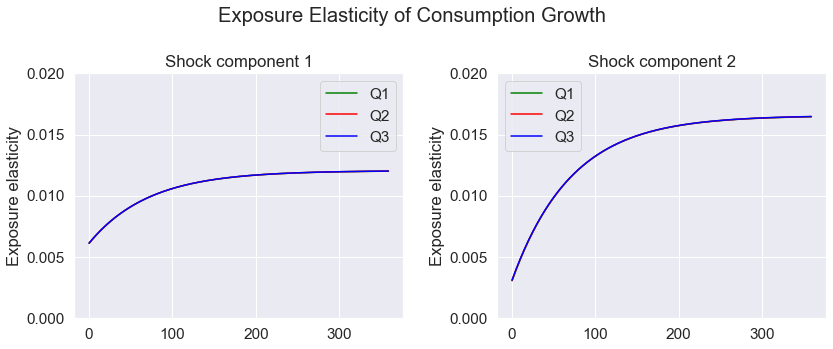

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))
expo_elas_shock_0_plot = pd.DataFrame([np.arange(T), expo_elas_shock_0[0].flatten(), expo_elas_shock_0[1].flatten(), expo_elas_shock_0[2].flatten()], index=index).T
expo_elas_shock_1_plot = pd.DataFrame([np.arange(T), expo_elas_shock_1[0].flatten(), expo_elas_shock_1[1].flatten(), expo_elas_shock_1[2].flatten()], index=index).T
plot_elas = [expo_elas_shock_0_plot, expo_elas_shock_1_plot] 

for i in range(len(plot_elas)):
    for j in range(n_qt):
        sns.lineplot(data=plot_elas[i], x='T', y=line_labl[j], ax=axes[i], color=line_color[j], label=line_labl[j])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Exposure elasticity')
        axes[i].set_title(shock_labl[i])
axes[0].set_ylim([0,0.02])
axes[1].set_ylim([0,0.02])
fig.suptitle('Exposure Elasticity of Consumption Growth')
fig.tight_layout()
plt.show()

### 6.2.1 Price elasticity

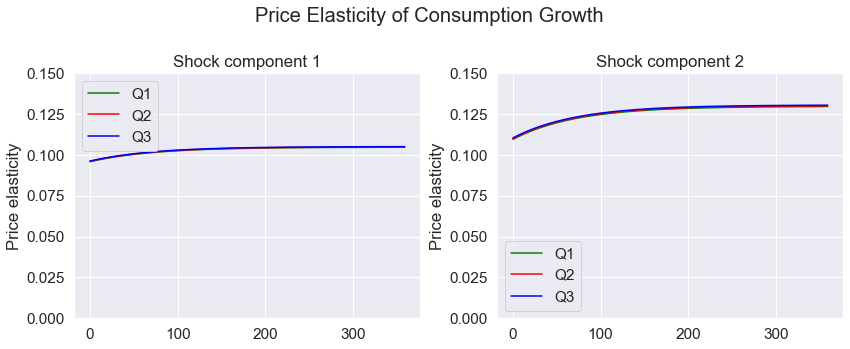

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (12,5))
price_elas_shock_0_plot = pd.DataFrame([np.arange(T),price_elas_shock_0[0].flatten(),price_elas_shock_0[1].flatten(),price_elas_shock_0[2].flatten()], index = index).T
price_elas_shock_1_plot = pd.DataFrame([np.arange(T),price_elas_shock_1[0].flatten(),price_elas_shock_1[1].flatten(),price_elas_shock_1[2].flatten()], index = index).T
plot_elas = [price_elas_shock_0_plot, price_elas_shock_1_plot] 

for i in range(len(plot_elas)):
    for j in range(n_qt):
        sns.lineplot(data=plot_elas[i],  x='T', y=line_labl[j], ax=axes[i], color=line_color[j], label=line_labl[j])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Price elasticity')
        axes[i].set_title(shock_labl[i])

axes[0].set_ylim([0,0.15])
axes[1].set_ylim([0,0.15])

fig.suptitle('Price Elasticity of Consumption Growth')
fig.tight_layout()
plt.show()

# Reference

[1] Lombardo, Giovanni and Harald Uhlig. 2018. A Theory of Pruning. *International Economic Review* 59 (4):1825–1836.

[2] Schmitt-Grohe, Stephanie and Mart ́ın Uribe. 2004. Solving Dynamic General Equilibrium Models Using a Second-Order Approximation to the Policy Function. *Journal of Economic Dynamics and Control* 28 (4):755–775.